In [16]:
# Cell 1: Importing Libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import random


In [17]:
# Cell 2: Define paths
base_dir = r"C:\Users\mavee\Downloads\dev\Processed_Images"
img_size = (128, 128)  # Resize images to 128x128
batch_size = 32


In [18]:
# Cell 3: Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' for Healthy/Tumor classification
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


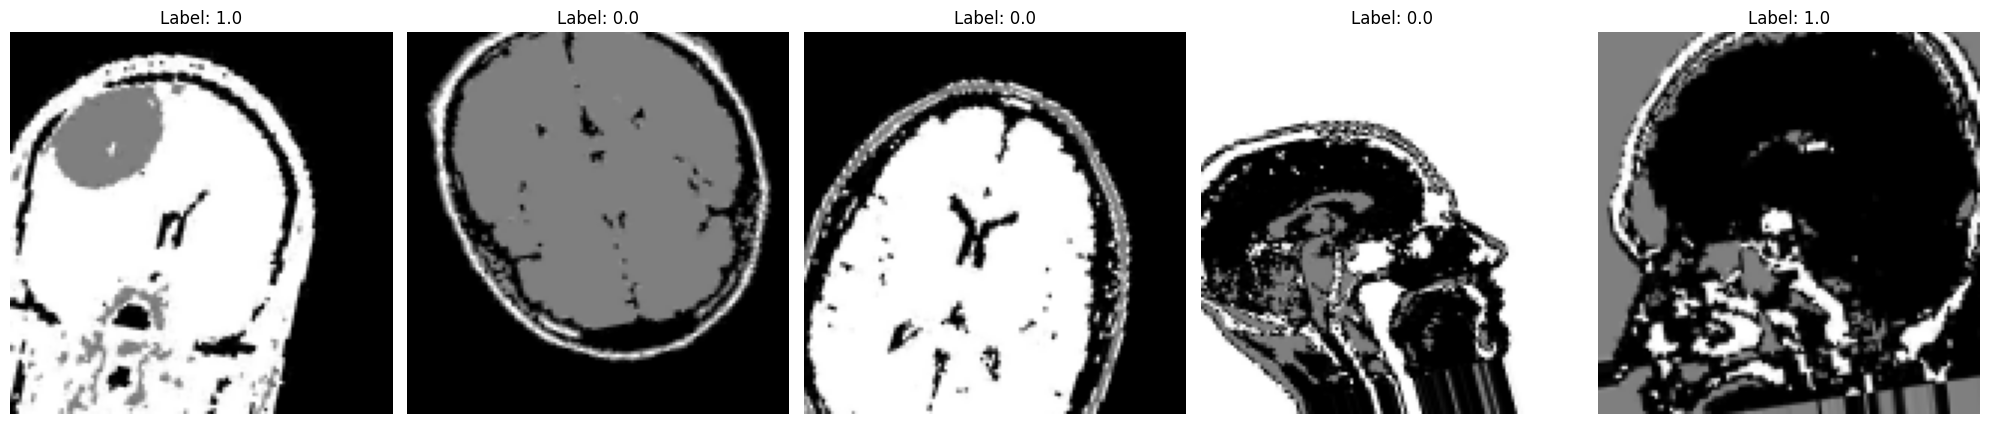

In [19]:
# Cell 4: Visualize Sample Images from the Dataset
# Function to plot images
def plot_images(images_arr, labels_arr, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels_arr):
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot sample images
plot_images(images, labels, n_images=5)


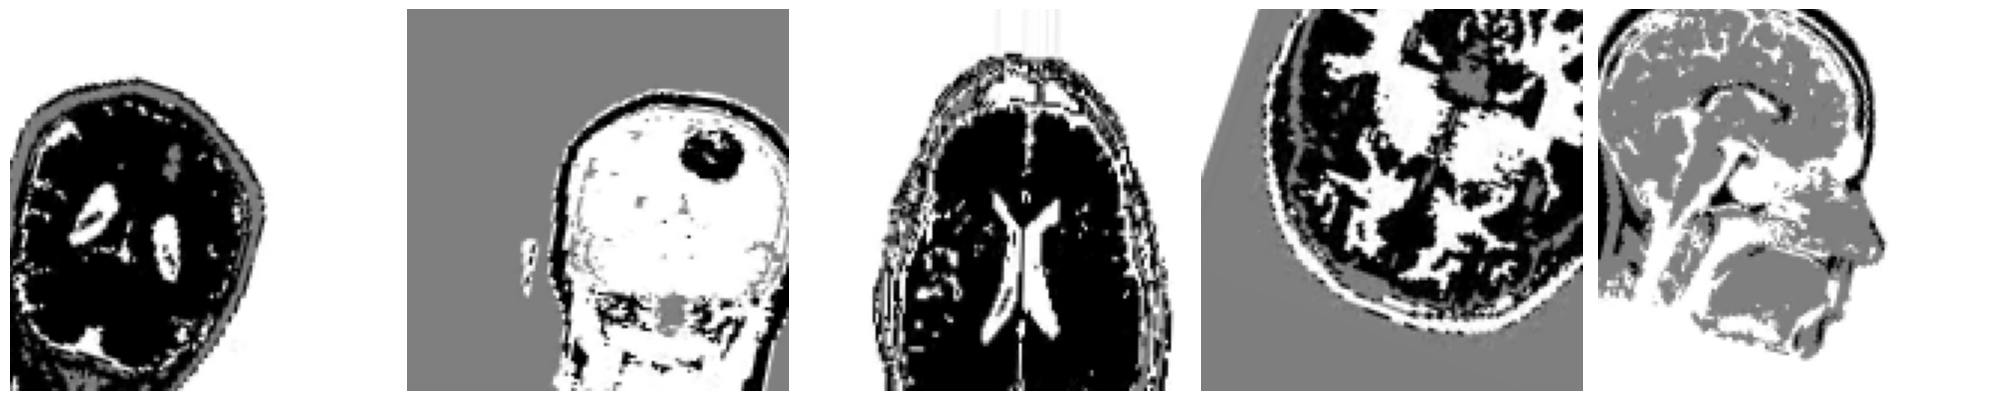

In [20]:
# Cell 5: Visualize Augmented Images
def plot_augmented_images(images_arr, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of augmented images
augmented_images, _ = next(train_generator)

# Plot augmented images
plot_augmented_images(augmented_images, n_images=5)


In [21]:
# Cell 6: Build the Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])


In [22]:
# Cell 7: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
# Cell 8: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=70,
    verbose=1
)


Epoch 1/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 385ms/step - accuracy: 0.5798 - loss: 0.7341 - val_accuracy: 0.6000 - val_loss: 0.6769
Epoch 2/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 401ms/step - accuracy: 0.5980 - loss: 0.6668 - val_accuracy: 0.6790 - val_loss: 0.6373
Epoch 3/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 403ms/step - accuracy: 0.6460 - loss: 0.6225 - val_accuracy: 0.7450 - val_loss: 0.5330
Epoch 4/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 399ms/step - accuracy: 0.7062 - loss: 0.5539 - val_accuracy: 0.7310 - val_loss: 0.5206
Epoch 5/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 418ms/step - accuracy: 0.7451 - loss: 0.5180 - val_accuracy: 0.7780 - val_loss: 0.4793
Epoch 6/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 354ms/step - accuracy: 0.7867 - loss: 0.4685 - val_accuracy: 0.7650 - val_loss: 0.4854
Epoch 7/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 394ms/step - accuracy: 0.8159 - loss: 0.4164 - val_accuracy: 0.7960 - val_loss: 0.4075
Epoch 8/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 382ms/step - accuracy: 0.8386 - loss: 0

In [24]:
# Cell 9: Save the Model
model_path = "mri_brain_segmentation_model.h5"
model.save(model_path)
print(f"Model saved to {model_path}")


Model saved to mri_brain_segmentation_model.h5


Text(0.5, 1.0, 'Accuracy')

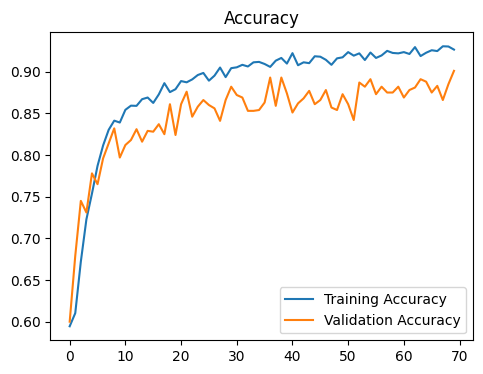

In [25]:
# Cell 10: Visualize Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')



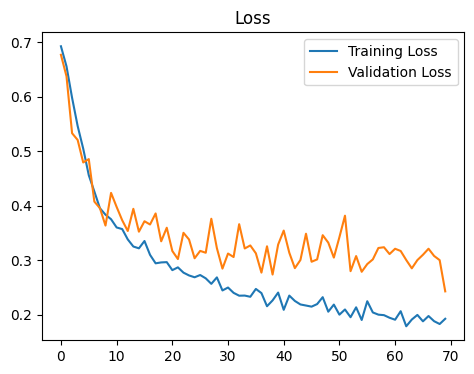

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [27]:
# Cell 11: Test the Model
img_path = r"C:\Users\mavee\Downloads\dev\Processed_Images\Healthy\mri_healthy (88).jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Predicted: Tumor")
else:
    print("Predicted: Healthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Predicted: Healthy
